In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

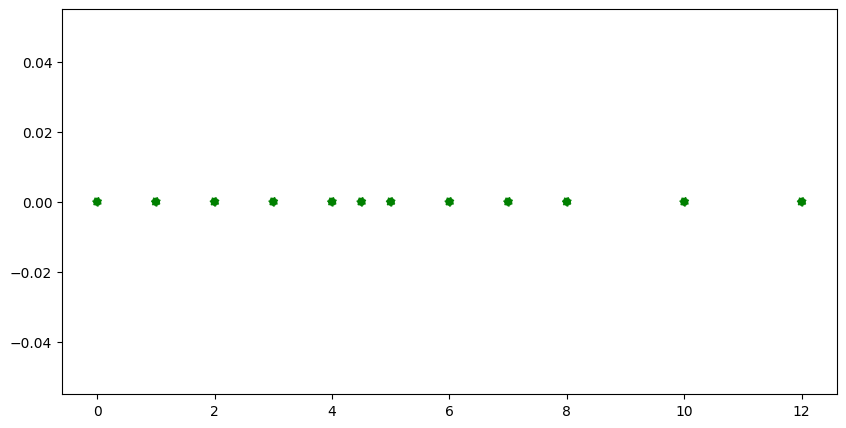

In [42]:
# initial some points along the line
samples = [0,1,3,4,5,6, 2,4.5,7,8,10,12]
# plot them
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c='green')
plt.show()

In [43]:
mu1 = 0
sigma1 = 1
mu2 = 1
sigma2 = 1
# sample 100000 times from this two initial normal distribution 
samples_1 = np.random.normal(mu1, sigma1, 100000)
samples_2 = np.random.normal(mu2, sigma2, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1, sigma1).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2, sigma2).pdf(np.sort(samples_2))

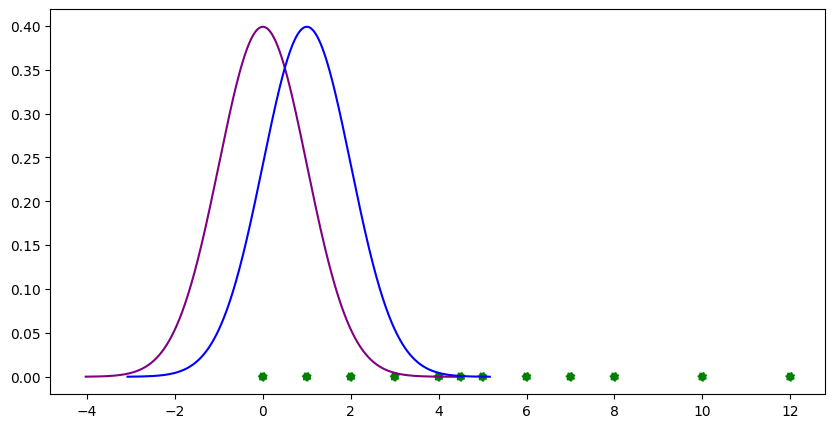

In [ ]:
# plot
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c='green')
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='blue')
plt.show()

In [ ]:
# get likelihood for each x from gaussian_1 and gaussian_0
# get likelihood of x in gaussian_1
from math import pi
likelihood_x_gaussian_1 = [1/np.sqrt(2*pi) * np.exp((-1/2)*(xi**2)) for xi in samples]
# get likelihood of x in gaussian_0
likelihood_x_gaussian_0 = [1/np.sqrt(2*pi) * np.exp((-1/2)*((xi-1)**2)) for xi in samples]
# create a dataframe 
df_likelihood = pd.DataFrame([samples, likelihood_x_gaussian_1, likelihood_x_gaussian_0]).transpose()
df_likelihood.columns = ['samples', 'p(X=x|class0)', 'p(X=x|class1)']
df_likelihood


,samples,p(X=x|class0),p(X=x|class1)
0,0.0,3.989423e-01,2.419707e-01
1,1.0,2.419707e-01,3.989423e-01
2,3.0,4.431848e-03,5.399097e-02
3,4.0,1.338302e-04,4.431848e-03
4,5.0,1.486720e-06,1.338302e-04
5,6.0,6.075883e-09,1.486720e-06
6,2.0,5.399097e-02,2.419707e-01
7,4.5,1.598374e-05,8.726827e-04
8,7.0,9.134720e-12,6.075883e-09
9,8.0,5.052271e-15,9.134720e-12


In [ ]:
# get likelihood of class0 and class1 occurs given samples
# define prior
prior_class_0 = 0.5
prior_class_1 = 0.5
# get likelihood of gaussian_1 occurs based on x1
df_likelihood['p(class0|x)'] = df_likelihood.apply(lambda row: 
                                                     row["p(X=x|class0)"] * 0.5/(row["p(X=x|class1)"]*0.5+row["p(X=x|class0)"]*0.5),axis =1)
# get likelihood of gaussian_0 occurs based on x1
df_likelihood['p(class1|x)'] = df_likelihood.apply(lambda row: 
                                                       row['p(X=x|class1)'] * 0.5/(row['p(X=x|class1)']*0.5+row['p(X=x|class0)']*0.5), axis=1)
df_likelihood

,samples,p(X=x|class0),p(X=x|class1),p(class0|x),p(class1|x)
0,0.0,3.989423e-01,2.419707e-01,0.622459,0.377541
1,1.0,2.419707e-01,3.989423e-01,0.377541,0.622459
2,3.0,4.431848e-03,5.399097e-02,0.075858,0.924142
3,4.0,1.338302e-04,4.431848e-03,0.029312,0.970688
4,5.0,1.486720e-06,1.338302e-04,0.010987,0.989013
5,6.0,6.075883e-09,1.486720e-06,0.004070,0.995930
6,2.0,5.399097e-02,2.419707e-01,0.182426,0.817574
7,4.5,1.598374e-05,8.726827e-04,0.017986,0.982014
8,7.0,9.134720e-12,6.075883e-09,0.001501,0.998499
9,8.0,5.052271e-15,9.134720e-12,0.000553,0.999447


In [ ]:
# standardization of p(Gaussian_1|x) and p(Gaussian_0|x)
df_likelihood['p(class0|x)_standardized'] = df_likelihood['p(class0|x)'] / sum(df_likelihood['p(class0|x)'])
df_likelihood['p(class1|x)_standardized'] = df_likelihood['p(class1|x)'] / sum(df_likelihood['p(class1|x)'])
df_likelihood

,samples,p(X=x|class0),p(X=x|class1),p(class0|x),p(class1|x),p(class0|x)_standardized,p(class1|x)_standardized
0,0.0,3.989423e-01,2.419707e-01,0.622459,0.377541,0.470570,0.035359
1,1.0,2.419707e-01,3.989423e-01,0.377541,0.622459,0.285415,0.058298
2,3.0,4.431848e-03,5.399097e-02,0.075858,0.924142,0.057348,0.086553
3,4.0,1.338302e-04,4.431848e-03,0.029312,0.970688,0.022160,0.090912
4,5.0,1.486720e-06,1.338302e-04,0.010987,0.989013,0.008306,0.092628
5,6.0,6.075883e-09,1.486720e-06,0.004070,0.995930,0.003077,0.093276
6,2.0,5.399097e-02,2.419707e-01,0.182426,0.817574,0.137911,0.076572
7,4.5,1.598374e-05,8.726827e-04,0.017986,0.982014,0.013597,0.091973
8,7.0,9.134720e-12,6.075883e-09,0.001501,0.998499,0.001135,0.093517
9,8.0,5.052271e-15,9.134720e-12,0.000553,0.999447,0.000418,0.093606


In [ ]:
# update mu1, mu2, sigma1, sigma2
mu1_new = sum(df_likelihood['samples'] * df_likelihood['p(class0|x)_standardized'])
print(mu1_new)
variance1_new = sum((df_likelihood['samples']-mu1_new)**2 * df_likelihood['p(class0|x)_standardized'])
print(variance1_new)
sigma1_new = np.sqrt(variance1_new/len(samples))
print(sigma1_new)
mu2_new = sum(df_likelihood['samples'] * df_likelihood['p(class1|x)_standardized'])
print(mu2_new)
variance2_new = sum((df_likelihood['samples']-mu2_new)**2 * df_likelihood['p(class1|x)_standardized'])
print(variance2_new)
sigma2_new = np.sqrt(variance2_new/len(samples))
print(sigma2_new)

0.9550423699975553
1.4785144696576509
0.35101216380367445
5.735264447839885
10.66561373082391
0.9427625068039808


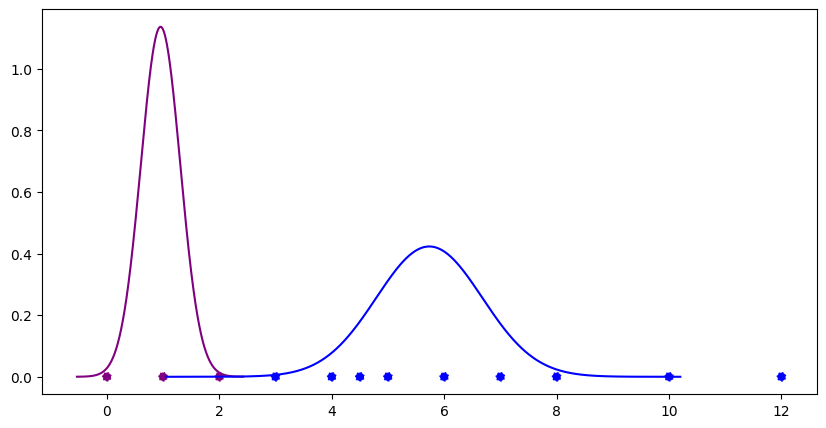

In [ ]:
# finish 1st round
# generate class label if we need a hard assignment
p0 = [scipy.stats.norm(mu1_new,sigma1_new).pdf(x) for x in samples]
p1 = [scipy.stats.norm(mu2_new,sigma2_new).pdf(x) for x in samples]
class_pred= []
for x, y in zip(p0, p1):
    if x < y: 
        class_pred_i = 1
    else:
        class_pred_i = 0
    class_pred.append(class_pred_i)
# sample 100000 times from this two updated normal distribution from initial
samples_1 = np.random.normal(mu1_new, sigma1_new, 100000)
samples_2 = np.random.normal(mu2_new, sigma2_new, 100000)
# get pdf from the samples 
y_normal_1 = scipy.stats.norm(mu1_new, sigma1_new).pdf(np.sort(samples_1))
y_normal_2 = scipy.stats.norm(mu2_new, sigma2_new).pdf(np.sort(samples_2))
# plot 
plt.rcParams["figure.figsize"] = [10, 5]
y_value = 0
y = np.zeros_like(samples) + y_value
plt.scatter(samples, y, ls='dotted', c=['blue' if x == 1 else 'purple' for x in class_pred])
plt.plot(np.sort(samples_1), y_normal_1, c='purple')
plt.plot(np.sort(samples_2), y_normal_2, c='blue')
plt.show()